In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)

In [35]:
def getXY(m, order):
    X = np.linspace(0, 2, m).reshape(m, 1)  # 2 * np.random.rand(m, 1)

    coeffs = 10 * np.random.rand(order + 1) - 5
    coeffs = np.floor(coeffs * 100) / 100
    return X, [np.polyval(coeffs, x) for x in X] + np.random.rand(m, 1), coeffs

In [36]:
# Plot the random data points
def plotData(X, Y, coeffs):
    diff = max(Y)[0] - min(Y)[0]
    plt.plot([0, 0], [min(Y)[0] - 0.5 * diff, max(Y)[0] + 0.5 * diff], 'k--', linewidth=1)

    enum = enumerate(coeffs[:-2])
    func = ' + '.join("${}x^{{{}}}$".format(coeff, len(coeffs) - exp - 1) for exp, coeff in enum)
    app = f'${coeffs[-2]}x$ + ${coeffs[-1]}$ + Noise[0, 1]'
    if func == '':
        func = app
    else:
        func += ' + ' + app

    plt.plot(X, Y, "b.", label=f"{func}")

    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=10)
    plt.xlim([-1, 3])
    plt.ylim([min(Y)[0] - 0.5 * diff, max(Y)[0] + 0.5 * diff])
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.show()

In [37]:
def main(X, Y, coeffs):
    x_curve = np.linspace(-1, 3, 200)
    
    Y_avg = np.mean(Y)
    SST = sum([(y - Y_avg) ** 2 for y in Y])[0]
    c = [np.ones((len(X), 1))]
    
    for d in range(1, 11):
        c.insert(0, c[0] * X)
        if d != 1 and d % 2 != 0:
            continue

        X_b = np.concatenate(c, axis=1)
        w_best = np.linalg.pinv(X_b).dot(Y)
        # A_inv = np.linalg.inv(X_b.T.dot(X_b))
        # b = X_b.T.dot(Y)
        # w_best = A_inv.dot(b)

        R2 = 1 - sum([(y - np.polyval(w_best, x)) ** 2 for x, y in zip(X, Y)])[0] / SST
        R2 = np.floor(R2 * 1000) / 1000

        w = np.floor(w_best * 100) / 100
        enum = enumerate(w[:-2])
        func = ' + '.join("${}x^{{{}}}$".format(coeff[0], len(w_best) - exp - 1) for exp, coeff in enum)
        app = f'${w[-2][0]}x$ + ${w[-1][0]}$'
        if func == '':
            func = app
        else:
            func += ' + ' + app

        plt.plot(x_curve, [np.polyval(w_best, i) for i in x_curve], "-", linewidth=2, label=f"{func} | $R^2$ = {R2}")

    plotData(X, Y, coeffs)

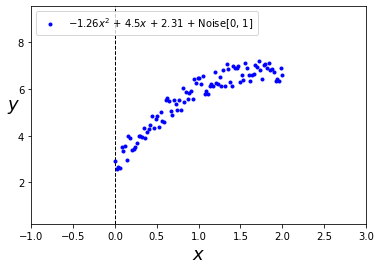

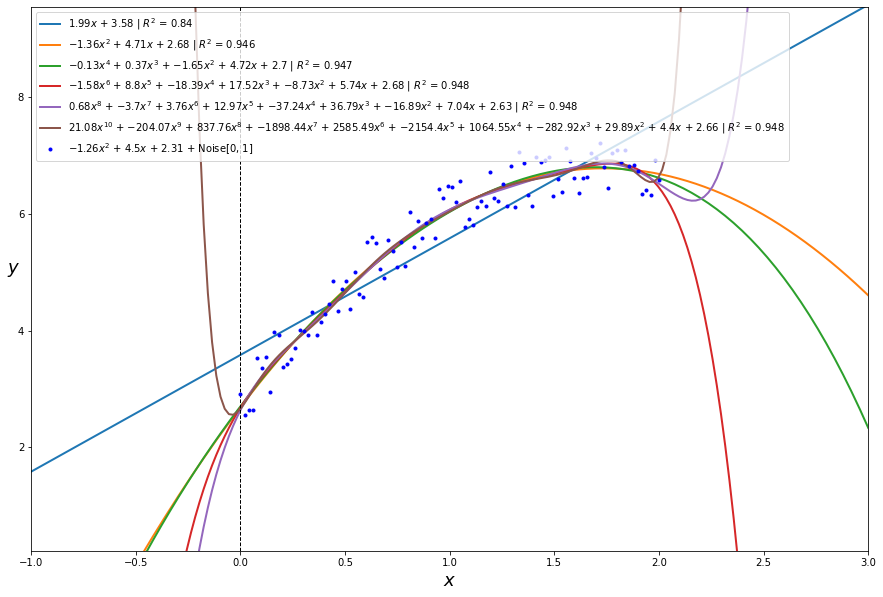

In [38]:
X, Y, c = getXY(100, 2)
plotData(X, Y, c)
main(X, Y, c)

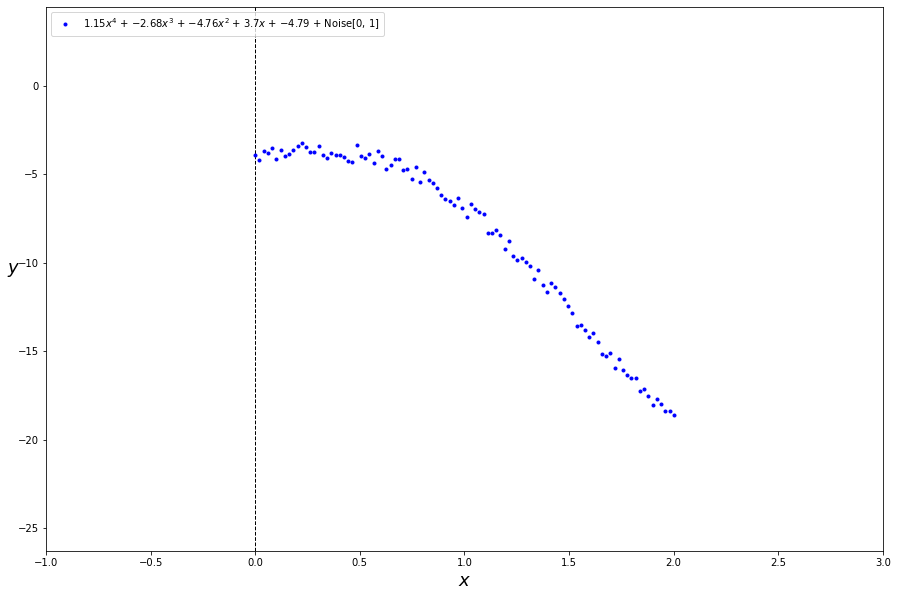

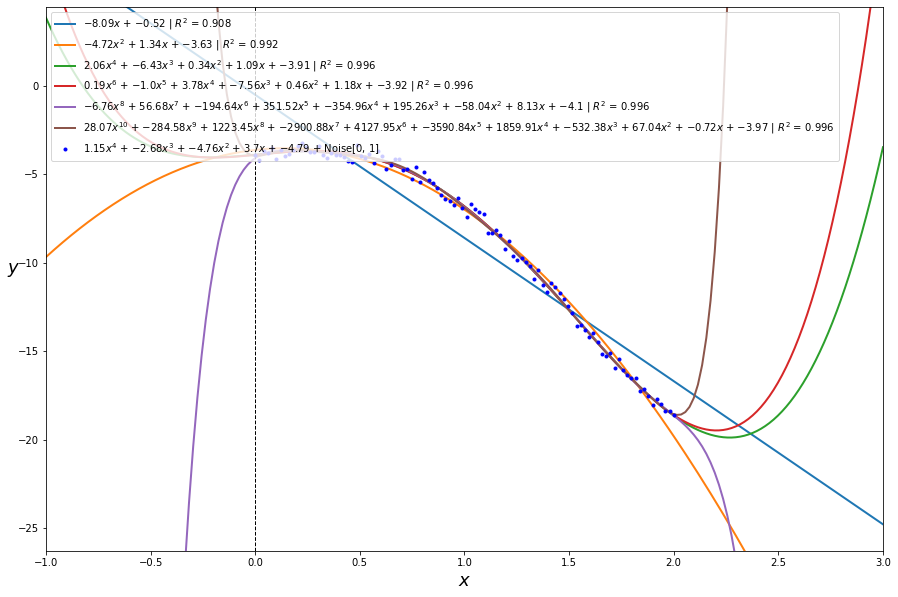

In [48]:
X, Y, c = getXY(100, 4)
plotData(X, Y, c)
main(X, Y, c)